In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# General Dropout Trend Modeling

In [ ]:
trend_df = pd.read_csv('/content/drive/MyDrive/MOOC_Feature_Project/MOOC-Pipeline/data_preprocess_EDA/cleaned_data/cleaned_averaged_usr_percent_by_items_1_8.csv')
trend_df.columns

Index(['normalized_order', 'normalized_user_percentage'], dtype='object')

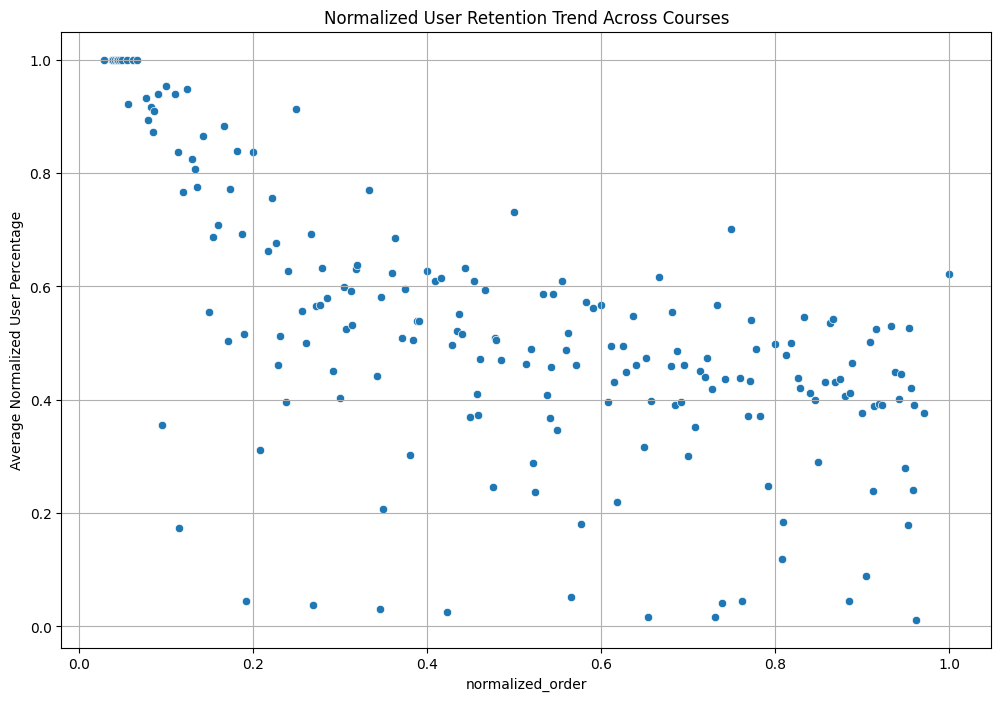

In [ ]:
# visualize dropout trend
plt.figure(figsize=(12, 8))
sns.scatterplot(data=trend_df, x='normalized_order', y='normalized_user_percentage')
plt.title('Normalized User Retention Trend Across Courses')
plt.xlabel('normalized_order')
plt.ylabel('Average Normalized User Percentage')
plt.grid()
plt.show()

## quadratic model fit and diagnostic plots

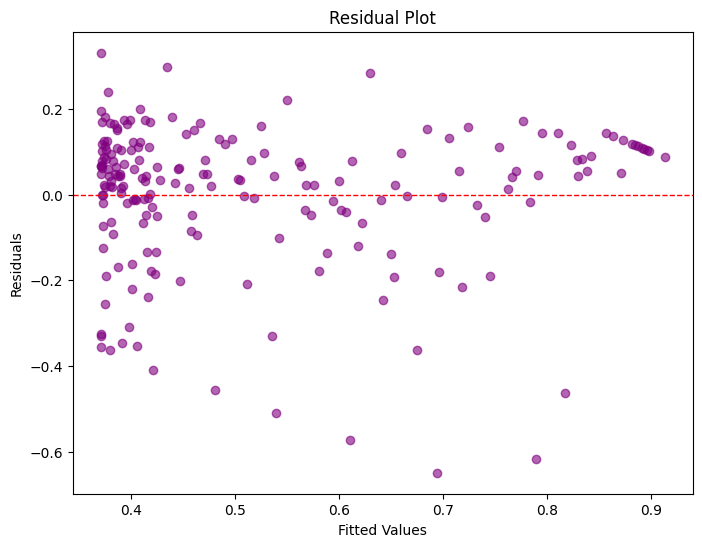

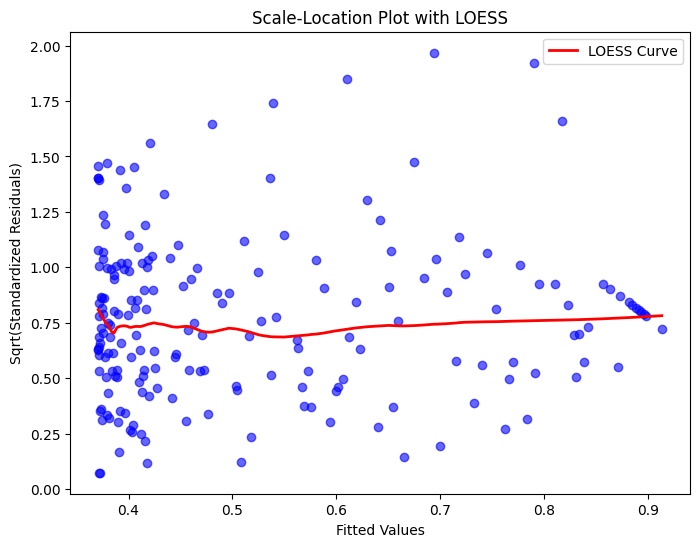

Intercept: 0.957443634724229
Coefficients: normalized_order = -1.5748009399938472, normalized_order_squared = 1.0569163582034837
R² (using model score method): 0.4924


In [ ]:
# model fit and diagnostics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.metrics import r2_score

# Adding a quadratic term to the DataFrame
trend_df['normalized_order_squared'] = trend_df['normalized_order'] ** 2

# Extracting independent (with quadratic term) and dependent variables
X = trend_df[['normalized_order', 'normalized_order_squared']].values  # Independent variables (with quadratic term)
y = trend_df['normalized_user_percentage'].values  # Dependent variable

# Fitting the regression model
quadratic_model = LinearRegression()
quadratic_model.fit(X, y)

# Predicting values
y_pred = quadratic_model.predict(X)

# Calculating residuals
residuals = y - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Standardized residuals
standardized_residuals = residuals / np.std(residuals)

# Scale-Location Plot (Standardized Residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, np.sqrt(np.abs(standardized_residuals)), color='blue', alpha=0.6)

# Fitting a LOESS curve
loess_smoothed = lowess(np.sqrt(np.abs(standardized_residuals)), y_pred, frac=0.3)
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='red', linewidth=2, label='LOESS Curve')

# Plot labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.title('Scale-Location Plot with LOESS')
plt.legend()
plt.show()

# Displaying the model coefficients
print(f"Intercept: {quadratic_model.intercept_}")
print(f"Coefficients: normalized_order = {quadratic_model.coef_[0]}, normalized_order_squared = {quadratic_model.coef_[1]}")


# Calculate R² using the model's score method
r2_model_score = quadratic_model.score(X, y)
print(f"R² (using model score method): {r2_model_score:.4f}")

## exponential model fit and diagnostic plots

Intercept: -0.31200709323835596
Coefficient for Normalized Order: -1.0450541053116307
R^2 Score: 0.14962150254224837


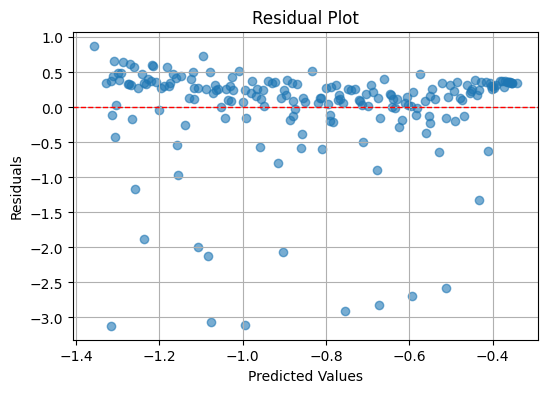

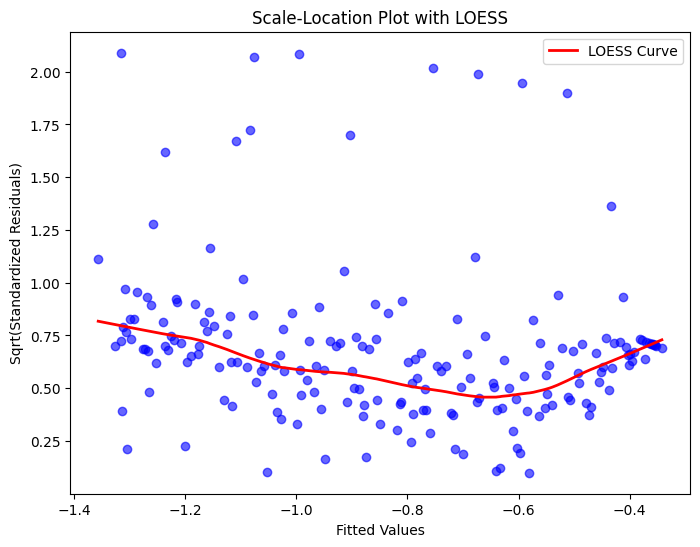

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming trend_df is your DataFrame
# Take the logarithm of normalized_user_percentage
trend_df['log_normalized_user_percentage'] = np.log(trend_df['normalized_user_percentage'])

# Prepare the independent and dependent variables
X = trend_df[['normalized_order']]  # Predictor (must be 2D for sklearn)
y = trend_df['log_normalized_user_percentage']  # Response

# Fit the linear regression model
exp_model = LinearRegression()
exp_model.fit(X, y)

# Predict using the model
y_pred = exp_model.predict(X)

# Calculate residuals
residuals = y - y_pred

# print coef
print(f"Intercept: {exp_model.intercept_}")
print(f"Coefficient for Normalized Order: {exp_model.coef_[0]}")

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print(f"R^2 Score: {r2}")

# Plot residual plot
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

# Standardized residuals
standardized_residuals = residuals / np.std(residuals)

# Scale-Location Plot (Standardized Residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, np.sqrt(np.abs(standardized_residuals)), color='blue', alpha=0.6)

# Fitting a LOESS curve
loess_smoothed = lowess(np.sqrt(np.abs(standardized_residuals)), y_pred, frac=0.3)
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='red', linewidth=2, label='LOESS Curve')

# Plot labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.title('Scale-Location Plot with LOESS')
plt.legend()
plt.show()

## model plots on all course items level

In [ ]:
course_item_df = pd.read_csv('/content/drive/MyDrive/MOOC_Feature_Project/MOOC-Pipeline/data_preprocess_EDA/cleaned_data/cleaned_graded_item_usr_counts_1_8.csv')
course_item_df.columns

Index(['course_id', 'course_slug', 'course_name', 'course_branch_id',
       'course_module_id', 'course_branch_module_order', 'course_lesson_id',
       'course_branch_lesson_order', 'course_item_id',
       'course_branch_item_name', 'course_branch_item_order', 'is_graded',
       'course_branch_item_optional', 'course_branch_item_lecture_duration_ms',
       'quiz_is_graded', 'item_weight_in_course_branch_percentage',
       'unique_user_count', 'graded_item_order', 'max_users_per_course',
       'normalized_user_percentage', 'max_order', 'normalized_order'],
      dtype='object')

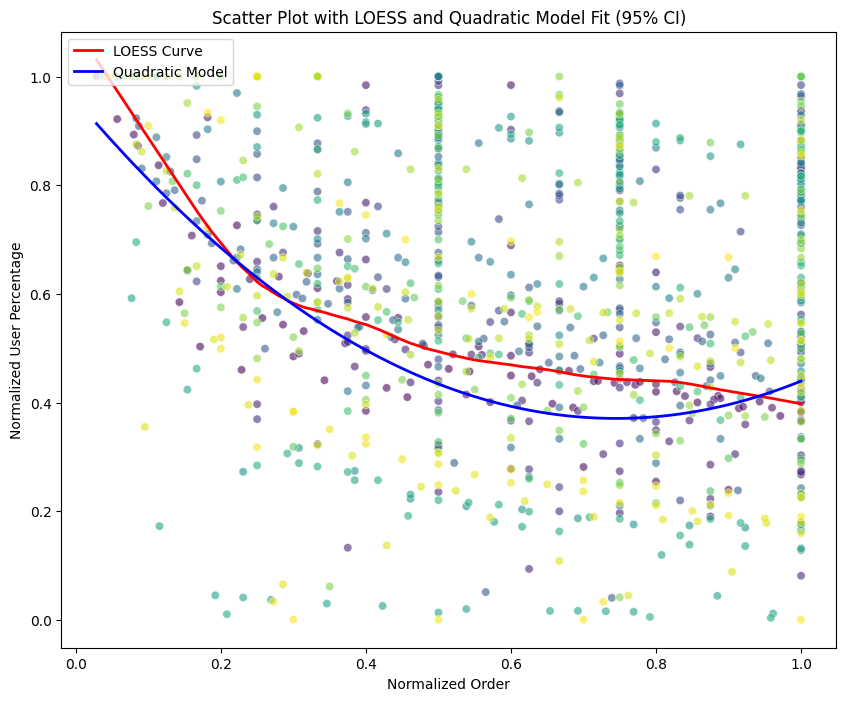

In [ ]:
# course items visualizations based on models
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Scatter plot of course items with 'course_name' as hue
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=course_item_df,
    x='normalized_order',
    y='normalized_user_percentage',
    hue='course_name',
    palette='viridis',
    alpha=0.6,
    legend=False  # Turn off legend
)

# Add nonparametric LOESS curve from trend_df
loess_trend = lowess(trend_df['normalized_user_percentage'], trend_df['normalized_order'], frac=0.3)
plt.plot(loess_trend[:, 0], loess_trend[:, 1], color='red', label='LOESS Curve', linewidth=2)

# Add quadratic model fit and 95% CI
X_range = np.linspace(course_item_df['normalized_order'].min(), course_item_df['normalized_order'].max(), 300)
X_range_with_squared = np.column_stack((X_range, X_range**2))
y_pred_range = quadratic_model.predict(X_range_with_squared)

# Plot the quadratic model and 95% CI
plt.plot(X_range, y_pred_range, color='blue', label='Quadratic Model', linewidth=2)

# Labels and legend
plt.xlabel('Normalized Order')
plt.ylabel('Normalized User Percentage')
plt.title('Scatter Plot with LOESS and Quadratic Model Fit (95% CI)')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


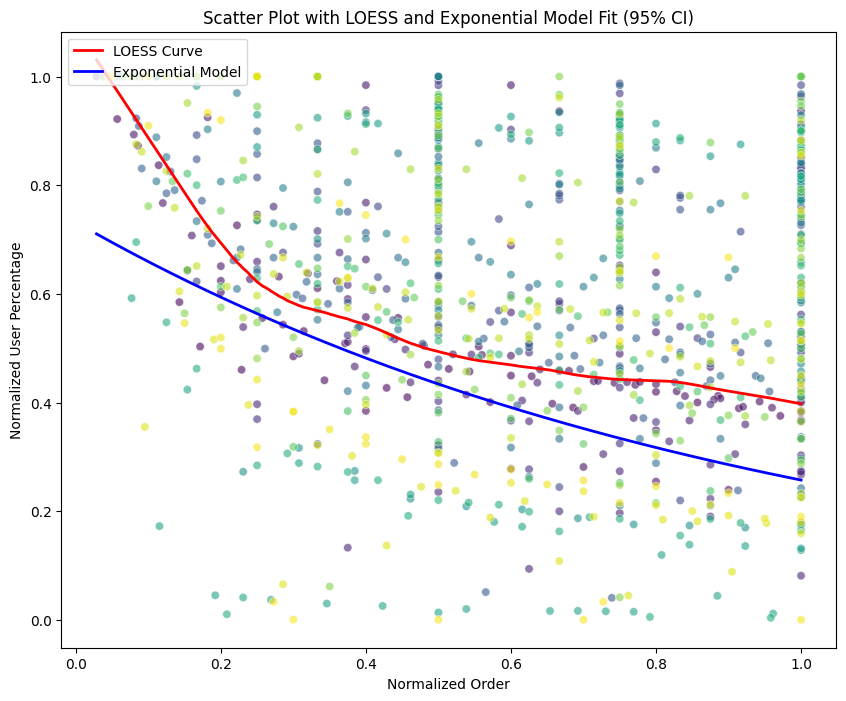

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

# Scatter plot of course items with 'course_name' as hue
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=course_item_df,
    x='normalized_order',
    y='normalized_user_percentage',
    hue='course_name',
    palette='viridis',
    alpha=0.6,
    legend=False  # Turn off legend
)

# Add nonparametric LOESS curve from trend_df
loess_trend = lowess(trend_df['normalized_user_percentage'], trend_df['normalized_order'], frac=0.3)
plt.plot(loess_trend[:, 0], loess_trend[:, 1], color='red', label='LOESS Curve', linewidth=2)

# Fit an exponential model
# Log-transform normalized_user_percentage
trend_df['log_normalized_user_percentage'] = np.log(trend_df['normalized_user_percentage'])

# Prepare data for linear regression (log-transformed)
X = trend_df[['normalized_order']]
y_log = trend_df['log_normalized_user_percentage']

# Linear regression for the log-transformed data
exp_model = LinearRegression()
exp_model.fit(X, y_log)

# Exponential model predictions
X_range = np.linspace(course_item_df['normalized_order'].min(), course_item_df['normalized_order'].max(), 300).reshape(-1, 1)
y_pred_log = exp_model.predict(X_range)
y_pred_exp = np.exp(y_pred_log)

# Calculate residuals and standard error for 95% CI
residuals = y_log - exp_model.predict(X)
s_res = np.sqrt(np.sum(residuals**2) / (len(y_log) - 2))  # Residual standard error
z = norm.ppf(0.975)  # 1.96 for 95% confidence interval
ci_upper = np.exp(y_pred_log + z * s_res)
ci_lower = np.exp(y_pred_log - z * s_res)

# Plot the exponential model and 95% CI
plt.plot(X_range, y_pred_exp, color='blue', label='Exponential Model', linewidth=2)

# Labels and legend
plt.xlabel('Normalized Order')
plt.ylabel('Normalized User Percentage')
plt.title('Scatter Plot with LOESS and Exponential Model Fit (95% CI)')
plt.legend(loc='upper left')
plt.show()

# residual model fit

In [ ]:
# load in graded items with their assessments
graded_item_df = pd.read_csv('/content/drive/MyDrive/MOOC_Feature_Project/MOOC-Pipeline/data_preprocess_EDA/cleaned_data/cleaned_graded_item_usr_counts_1_8.csv')
assessment_df = pd.read_csv('/content/drive/MyDrive/MOOC_Feature_Project/MOOC-Pipeline/data_preprocess_EDA/raw_data/sql_assessments_1_25.csv')

# join raw data and fitler columns
graded_item_merge = pd.merge(graded_item_df, assessment_df, on=['course_branch_id', 'course_item_id'], how='inner')
graded_item_merge = graded_item_merge[['course_name', 'course_branch_id', 'course_item_id', 'course_branch_item_name_x','normalized_order', 'normalized_user_percentage',
                                       'item_weight_in_course_branch_percentage',
                                       'assessment_type_desc', 'assessment_passing_fraction','assessment_question_id','assessment_question_extra_credit', 'assessment_question_type_desc',
                                       'global_item_name', 'global_item_content_type','global_item_time_commitment']]
graded_item_merge.columns

KeyError: "['course_id'] not in index"

In [ ]:
# Assuming assessment_df is already loaded
# Feature 1: Count of assessment_question_id in each course_item_id
assessment_df['question_counts'] = (
    assessment_df.groupby(['course_branch_id', 'course_item_id'])['assessment_question_id']
    .transform(lambda x: x.notnull().sum())
)

# Feature 2: Distribution of assessment_question_type_desc within each course_item_id
# First, count the occurrences of each assessment_question_type_desc in each course_item_id
type_counts = (
    assessment_df.groupby(['course_branch_id', 'course_item_id', 'assessment_question_type_desc'])['assessment_question_id']
    .count()
    .reset_index(name='type_count')
)

# Calculate the total questions in each course_item_id
total_counts = (
    assessment_df.groupby(['course_branch_id', 'course_item_id'])['assessment_question_id']
    .count()
    .reset_index(name='total_questions')
)

# Merge the type counts with the total counts
type_distribution = pd.merge(type_counts, total_counts, on=['course_branch_id', 'course_item_id'])

# Calculate the percentage for each question type
type_distribution['type_percentage'] = (
    type_distribution['type_count'] / type_distribution['total_questions']
)

# Pivot the type_distribution table to create columns for each question type's percentage
pivoted_type_distribution = type_distribution.pivot_table(
    index=['course_branch_id', 'course_item_id'],
    columns='assessment_question_type_desc',
    values='type_percentage',
    fill_value=0
).reset_index()

# Rename the columns to include "_percentage" suffix
pivoted_type_distribution = pivoted_type_distribution.rename(
    columns=lambda x: f"{x}_percentage" if ((x != 'course_item_id') and (x != 'course_branch_id')) else x
)

# Merge the pivoted table back into the original DataFrame
assessment_df = pd.merge(
    assessment_df,
    pivoted_type_distribution,
    on=['course_branch_id', 'course_item_id'],
    how='left'
)

# Drop rows where 'global_item_content_type' is 'placeholder'
assessment_df = assessment_df[assessment_df['global_item_content_type'] != 'placeholder']

# Drop rows where 'assessment_type_desc' is NaN
assessment_df = assessment_df.dropna(subset=['assessment_type_desc'])

# Create a dummy variable 'is_staff_graded'
assessment_df['is_staff_graded'] = (assessment_df['global_item_content_type'] == 'staffGraded').astype(int)

# Print the count of missing values in each column
print(assessment_df.isna().sum())


course_id                                0
course_branch_id                         0
course_item_id                           0
course_branch_item_name                  0
is_graded                                0
quiz_assessment_id                       0
quiz_is_graded                           0
assessment_type_desc                     0
assessment_passing_fraction              0
assessment_feedback_configuration    11214
assessment_question_id                   0
assessment_question_cuepoint             0
assessment_question_order                0
assessment_question_weight               0
assessment_question_extra_credit         0
assessment_question_type_desc            2
assessment_question_prompt               2
assessment_option_id                   931
assessment_option_display              931
assessment_option_feedback             931
assessment_option_correct              931
assessment_option_index              29131
global_item_id                           0
global_item

In [ ]:
assessment_df.to_csv('/content/drive/MyDrive/MOOC_Feature_Project/MOOC-Pipeline/data_preprocess_EDA/cleaned_data/engineered_assessment_df.csv', index=False)

## quadratic and exponential model residuals

In [ ]:
# Add a column for the squared term for the quadratic model
graded_item_merge['normalized_order_squared'] = graded_item_merge['normalized_order'] ** 2

# Predicted values for the quadratic model
graded_item_merge['predicted_user_percentage_quadratic'] = quadratic_model.predict(
    graded_item_merge[['normalized_order', 'normalized_order_squared']]
)

# Predicted values for the exponential model
graded_item_merge['predicted_user_percentage_exp'] = np.exp(
    exp_model.predict(graded_item_merge[['normalized_order']])
)

# Calculate residuals for both models
graded_item_merge['residual_user_percentage_quadratic'] = (
    graded_item_merge['normalized_user_percentage'] - graded_item_merge['predicted_user_percentage_quadratic']
)
graded_item_merge['residual_user_percentage_exp'] = (
    graded_item_merge['normalized_user_percentage'] - graded_item_merge['predicted_user_percentage_exp']
)

# Display the first few rows to verify
print(graded_item_merge[[
    'normalized_order',
    'normalized_user_percentage',
    'predicted_user_percentage_quadratic',
    'residual_user_percentage_quadratic',
    'predicted_user_percentage_exp',
    'residual_user_percentage_exp'
]].head())

   normalized_order  normalized_user_percentage  \
0          0.250000                    1.000000   
1          0.500000                    0.948658   
2          0.750000                    0.927800   
3          1.000000                    0.830222   
4          0.333333                    1.000000   

   predicted_user_percentage_quadratic  residual_user_percentage_quadratic  \
0                             0.629801                            0.370199   
1                             0.434272                            0.514386   
2                             0.370858                            0.556942   
3                             0.439559                            0.390663   
4                             0.549945                            0.450055   

   predicted_user_percentage_exp  residual_user_percentage_exp  
0                       0.563679                      0.436321  
1                       0.434077                      0.514581  
2                       0.334

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## assessments feature engineering

In [ ]:
# Feature 1: Count of assessment_question_id in each course_item_id
# Group by course_item_id and count the number of assessment_question_id (handling NaN values as 0)
graded_item_merge['question_counts'] = (
    graded_item_merge.groupby(['course_branch_id', 'course_item_id'])['assessment_question_id']
    .transform(lambda x: x.notnull().sum())
)

# Feature 2: Distribution of assessment_question_type_desc within each course_item_id
# First, count the occurrences of each assessment_question_type_desc in each course_item_id
type_counts = (
    graded_item_merge.groupby(['course_branch_id', 'course_item_id', 'assessment_question_type_desc'])['assessment_question_id']
    .count()
    .reset_index(name='type_count')
)

# Calculate the total questions in each course_item_id
total_counts = (
    graded_item_merge.groupby(['course_branch_id', 'course_item_id'])['assessment_question_id']
    .count()
    .reset_index(name='total_questions')
)

# Merge the type counts with the total counts
type_distribution = pd.merge(type_counts, total_counts, on=['course_branch_id', 'course_item_id'])

# Calculate the percentage for each question type
type_distribution['type_percentage'] = (
    type_distribution['type_count'] / type_distribution['total_questions']
)

# Pivot the type_distribution table to create columns for each question type's percentage
pivoted_type_distribution = type_distribution.pivot_table(
    index=['course_branch_id', 'course_item_id'],
    columns='assessment_question_type_desc',
    values='type_percentage',
    fill_value=0
).reset_index()

# Rename the columns to include "_percentage" suffix
pivoted_type_distribution = pivoted_type_distribution.rename(
    columns=lambda x: f"{x}_percentage" if ((x != 'course_item_id') and (x != 'course_branch_id')) else x
)

# Merge the pivoted table back into the original DataFrame
graded_item_merge = pd.merge(
    graded_item_merge,
    pivoted_type_distribution,
    on=['course_branch_id', 'course_item_id'],
    how='left'
)

# Display the updated DataFrame with new percentage columns
print(graded_item_merge.isna().sum())

course_id                                    0
course_name                                  0
course_branch_id                             0
course_item_id                               0
course_branch_item_name_x                    0
normalized_order                             0
normalized_user_percentage                   0
item_weight_in_course_branch_percentage      0
assessment_type_desc                       538
assessment_passing_fraction                538
assessment_question_id                     538
assessment_question_extra_credit           538
assessment_question_type_desc              538
global_item_name                             0
global_item_content_type                     0
global_item_time_commitment                  0
normalized_order_squared                     0
predicted_user_percentage_quadratic          0
predicted_user_percentage_exp                0
residual_user_percentage_quadratic           0
residual_user_percentage_exp                 0
question_coun

## data cleaning and filtering

In [ ]:
# drop placeholder
graded_item_merge = graded_item_merge[graded_item_merge['global_item_content_type'] != 'placeholder']

# Drop rows where 'assessment_type_desc' is NaN
graded_item_merge = graded_item_merge.dropna(subset=['assessment_type_desc'])

# Create a dummy variable 'is_staff_graded'
graded_item_merge['is_staff_graded'] = (graded_item_merge['global_item_content_type'] == 'staffGraded').astype(int)

# Print the count of missing values in each column
print(graded_item_merge.isna().sum())

course_id                                  0
course_name                                0
course_branch_id                           0
course_item_id                             0
course_branch_item_name_x                  0
normalized_order                           0
normalized_user_percentage                 0
item_weight_in_course_branch_percentage    0
assessment_type_desc                       0
assessment_passing_fraction                0
assessment_question_id                     0
assessment_question_extra_credit           0
assessment_question_type_desc              0
global_item_name                           0
global_item_content_type                   0
global_item_time_commitment                0
normalized_order_squared                   0
predicted_user_percentage_quadratic        0
predicted_user_percentage_exp              0
residual_user_percentage_quadratic         0
residual_user_percentage_exp               0
question_counts                            0
checkbox_p

In [ ]:
resid_df = graded_item_merge[['course_id', 'course_name', 'course_branch_item_name_x', 'item_weight_in_course_branch_percentage',
                              'assessment_passing_fraction','global_item_time_commitment','residual_user_percentage_quadratic', 'residual_user_percentage_exp',
                              'question_counts','checkbox_percentage',
       'codeExpression_percentage', 'math expression_percentage',
       'mcq_percentage', 'mcqReflect_percentage', 'reflect_percentage',
       'regex_percentage', 'single numeric_percentage',
       'text exact match_percentage', 'is_staff_graded']].drop_duplicates()

resid_df.columns = ['course_id','course_name', 'item_name', 'item_weight_percent',
                              'passing_fraction','time_commitment','quadratic_model_residual', 'exp_model_residual', 'question_counts',
                              'checkbox_percentage',
       'codeExpression_percentage', 'math_expression_percentage',
       'mcq_percentage', 'mcqReflect_percentage', 'reflect_percentage',
       'regex_percentage', 'single_numeric_percentage',
       'text_match_percentage', 'is_staff_graded']
print(resid_df.head())
print(resid_df.shape)

                 course_id                                 course_name  \
7   0ej5C6CJEeiAExLt68dqiA  Computational Thinking for Problem Solving   
19  0ej5C6CJEeiAExLt68dqiA  Computational Thinking for Problem Solving   
29  0ej5C6CJEeiAExLt68dqiA  Computational Thinking for Problem Solving   
44  0ej5C6CJEeiAExLt68dqiA  Computational Thinking for Problem Solving   
61  0ej5C6CJEeiAExLt68dqiA  Computational Thinking for Problem Solving   

                                  item_name  item_weight_percent  \
7                         1.2 Decomposition             1.648352   
19                  1.3 Pattern Recognition             1.648352   
29  1.4 Data Representation and Abstraction             2.197802   
44                           1.5 Algorithms             2.197802   
61            2.1 Finding the Largest Value             1.648352   

    passing_fraction  time_commitment  quadratic_model_residual  \
7                0.7         600000.0                  0.086688   
19          

## heatmap

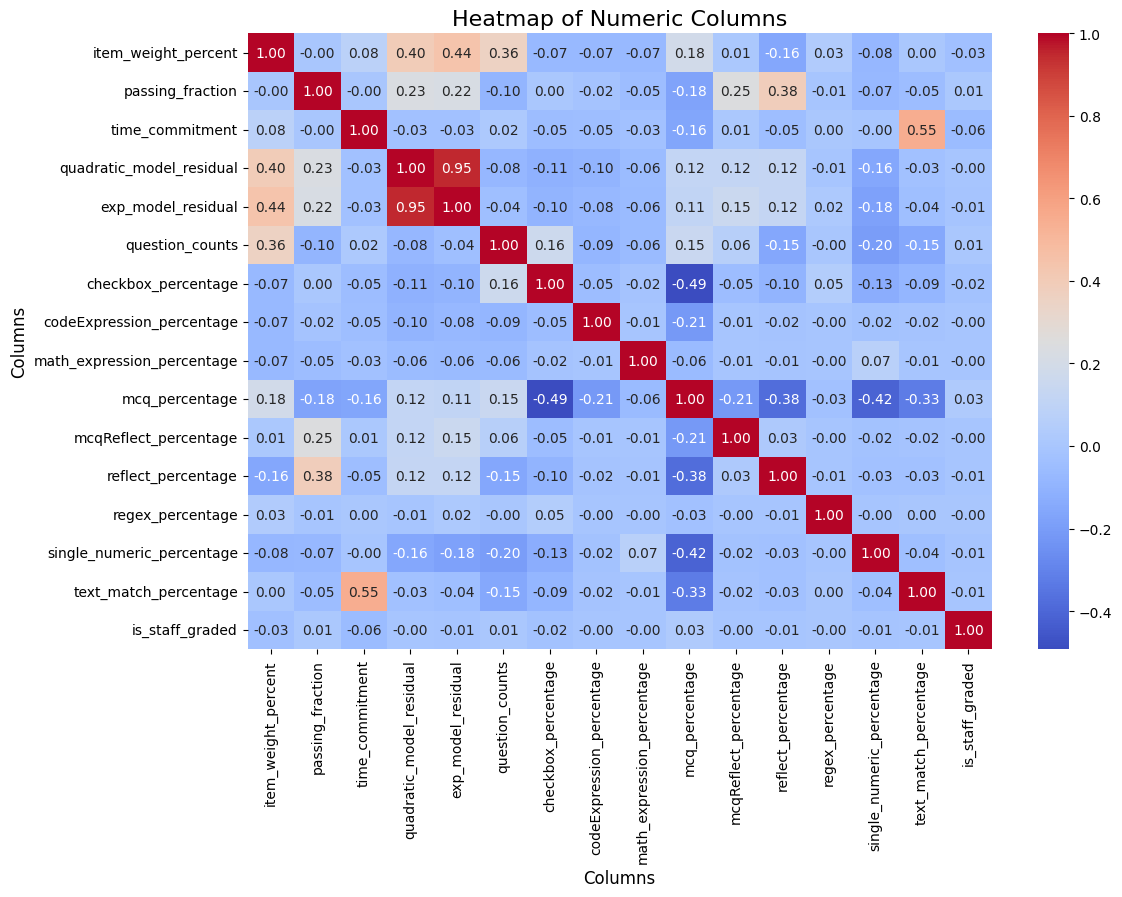

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns from the DataFrame
numeric_cols = resid_df.select_dtypes(include=['float64', 'int64'])

# Display the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Add titles and labels
plt.title('Heatmap of Numeric Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Columns', fontsize=12)

# Show the plot
plt.show()

# first item dropout analysis

In [ ]:
first_dropout_df = pd.read_csv('/content/drive/MyDrive/MOOC_Feature_Project/MOOC-Pipeline/data_preprocess_EDA/cleaned_data/clean_first_dropout_w_features.csv')
print(first_dropout_df.shape)

(101, 45)


In [ ]:
print(first_dropout_df.columns)

Index(['index', 'course_id', 'first_item_id', 'num_of_items',
       'dropout_percentage', 'course_days', 'forum_counts',
       'assessment_counts', 'asssignemnt_counts', 'required_review_counts',
       'grading_types', 'submission_types', 'is_graded_x', 'quiz_is_graded_x',
       'assessment_passing_fraction_x', 'global_item_time_commitment_x',
       'question_counts_x', 'checkbox_percentage_x',
       'checkboxReflect_percentage_x', 'codeExpression_percentage_x',
       'math expression_percentage_x', 'mcq_percentage_x',
       'mcqReflect_percentage_x', 'reflect_percentage_x', 'regex_percentage_x',
       'single numeric_percentage_x', 'text exact match_percentage_x',
       'is_staff_graded_x', 'second_item_id', 'is_graded_y',
       'quiz_is_graded_y', 'assessment_passing_fraction_y',
       'global_item_time_commitment_y', 'question_counts_y',
       'checkbox_percentage_y', 'checkboxReflect_percentage_y',
       'codeExpression_percentage_y', 'math expression_percentage_y',
 

In [ ]:
first_dropout_selected = first_dropout_df[['num_of_items',
       'dropout_percentage', 'course_days', 'forum_counts',
       'assessment_counts', 'asssignemnt_counts', 'required_review_counts',
       'grading_types', 'submission_types',
       'assessment_passing_fraction_x', 'global_item_time_commitment_x',
       'question_counts_x', 'checkbox_percentage_x',
       'checkboxReflect_percentage_x', 'codeExpression_percentage_x',
       'math expression_percentage_x', 'mcq_percentage_x',
       'mcqReflect_percentage_x', 'reflect_percentage_x', 'regex_percentage_x',
       'single numeric_percentage_x', 'text exact match_percentage_x',
       'assessment_passing_fraction_y',
       'global_item_time_commitment_y', 'question_counts_y',
       'checkbox_percentage_y', 'checkboxReflect_percentage_y',
       'codeExpression_percentage_y', 'math expression_percentage_y',
       'mcq_percentage_y', 'mcqReflect_percentage_y', 'reflect_percentage_y',
       'regex_percentage_y', 'single numeric_percentage_y',
       'text exact match_percentage_y']]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features and target variable
X = first_dropout_df[['num_of_items', 'course_days', 'forum_counts', 'assessment_counts',
                      'asssignemnt_counts', 'required_review_counts', 'assessment_passing_fraction_x',
                      'global_item_time_commitment_x', 'question_counts_x', 'checkbox_percentage_x',
                      'checkboxReflect_percentage_x', 'codeExpression_percentage_x',
                      'math expression_percentage_x', 'mcq_percentage_x', 'mcqReflect_percentage_x',
                      'reflect_percentage_x', 'regex_percentage_x', 'single numeric_percentage_x',
                      'text exact match_percentage_x', 'assessment_passing_fraction_y',
                      'global_item_time_commitment_y', 'question_counts_y', 'checkbox_percentage_y',
                      'checkboxReflect_percentage_y', 'codeExpression_percentage_y',
                      'math expression_percentage_y', 'mcq_percentage_y', 'mcqReflect_percentage_y',
                      'reflect_percentage_y', 'regex_percentage_y', 'single numeric_percentage_y',
                      'text exact match_percentage_y', 'grading_types', 'submission_types']]

y = first_dropout_df['dropout_percentage']

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, columns=['grading_types', 'submission_types'], drop_first=True)

# Handle missing values (if any)
X = X.fillna(0)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Display feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

R² Score: -4.5525
RMSE: 0.2876
